# Title: Comparing Residential and Commercial Real Estate: Price per Square Foot Analysis

# Introduction

Our project looks at real estate in Milwaukee, using data from 2002 to 2018 found on the city's official website. We're focusing on two types of properties: Residential (like houses and apartments) and Commercial (like shops and offices). Our main question is: "Is there a big difference in price for each square foot between Residential and Commercial properties in Milwaukee?"

We chose this Milwaukee dataset because it's got a lot of detail and covers many years. This helps us get a good picture of what's been happening in Milwaukee's property market over time. Understanding the prices of different kinds of properties is important for several reasons. It can help people who want to invest in property, real estate experts, and city planners make better decisions. For example, knowing if commercial properties are a lot more expensive than residential ones could influence where people choose to invest their money.

Our study is about more than just numbers. It's about seeing how the property market in Milwaukee has changed and what this might mean for the city's future. By comparing residential and commercial properties, we can find trends and spot any unusual changes in the market. This research can help us guess what might happen next in Milwaukee's property scene and give us a broader view of how the city's economy and community are doing.


# Methods and Results

# Preliminary Results

In [1]:
library(tidyverse)
library(repr)
library(datateachr)
library(digest)
library(infer)
library(gridExtra)
library(cowplot)
housing_data <- read.csv("https://raw.githubusercontent.com/mhuang306/STAT-201-proj/main/2002-2018-property-sales-data%5B1%5D.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




Here, we're importing any libraries that might be necessary for this assignment and reading the csv file off of our group's Github repository

In [2]:
head(housing_data)

,PropType,Taxkey,Address,CondoProject,District,Nbhd,Style,Extwall,Stories,Year_Built,Nr_of_rms,Fin_sqft,Units,Bdrms,Fbath,Hbath,Lotsize,Sale_date,Sale_price
,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>
1,Commercial,3230461110,2628 N 6TH ST,,6,6258,Commercial Exempt,,2,1880,0,1840,1,0,0,0,12750,2002-01,15900
2,Commercial,3590192000,1363 N PROSPECT AV,,3,6262,Mansions With Commercial Usage,,2,1876,0,6377,1,0,0,0,11840,2002-01,850000
3,Commercial,4161194000,617 S 94TH ST,,10,6272,Service Building,,1,1954,0,5022,1,0,0,0,9700,2002-01,119000
4,Commercial,1719836000,3624 W SILVER SPRING DR,,1,6218,"Store Bldg - Multi Story (Store & Apt, Store & O",,2,1955,0,6420,1,0,0,0,8792,2002-01,210000
5,Commercial,3480290000,3830 W LISBON AV,,15,6254,"Store Bldg - Multi Story (Store & Apt, Store & O",,2,1909,0,5956,1,0,0,0,4840,2002-01,48500
6,Commercial,4069983200,320 N 76TH ST,,10,6272,Strip Shopping Center,,1,1954,0,14200,1,0,0,0,16696,2002-01,885000


Here we do the cleaning for the data, removing NA values and zeroes, correcting column types, and stripping it down to just our potential variables of interest

In [3]:
housing_data <- housing_data |>
    select(PropType, Fin_sqft, Sale_price) |>
    filter(!is.na(PropType))|>
    filter(PropType == "Residential" | PropType == "Commercial") |>
    filter(Fin_sqft != 0, Sale_price != 0) |>
    mutate(Price_per_sqft = Sale_price/Fin_sqft) |>
    filter(Price_per_sqft < 1000)
    

head(housing_data)

,PropType,Fin_sqft,Sale_price,Price_per_sqft
,<chr>,<int>,<int>,<dbl>
1,Commercial,1840,15900,8.641304
2,Commercial,6377,850000,133.291516
3,Commercial,5022,119000,23.695739
4,Commercial,6420,210000,32.710280
5,Commercial,5956,48500,8.143049
6,Commercial,14200,885000,62.323944


Then, we separate the Residential and Commerical data, and plot the histograms of the Price_per_sqft data

In [4]:
Residential_data <- housing_data |>
filter(PropType == "Residential")|>
mutate(Price_per_sqft = round(Price_per_sqft, 0))
Commerical_data <- housing_data |>
filter(PropType == "Commercial") |>
mutate(Price_per_sqft = round(Price_per_sqft, 0))


head(Residential_data)
head(Commerical_data)

,PropType,Fin_sqft,Sale_price,Price_per_sqft
,<chr>,<int>,<int>,<dbl>
1,Residential,3476,42000,12
2,Residential,1992,145000,73
3,Residential,2339,30000,13
4,Residential,2329,66500,29
5,Residential,7450,150500,20
6,Residential,2462,75000,30


,PropType,Fin_sqft,Sale_price,Price_per_sqft
,<chr>,<int>,<int>,<dbl>
1,Commercial,1840,15900,9
2,Commercial,6377,850000,133
3,Commercial,5022,119000,24
4,Commercial,6420,210000,33
5,Commercial,5956,48500,8
6,Commercial,14200,885000,62


In [5]:
summary_data <- housing_data |>
group_by(PropType) |>
summarize(mean = mean(Price_per_sqft),
         median = median(Price_per_sqft))
summary_data

PropType,mean,median
<chr>,<dbl>,<dbl>
Commercial,82.93050,48.87358
Residential,96.37815,98.19601


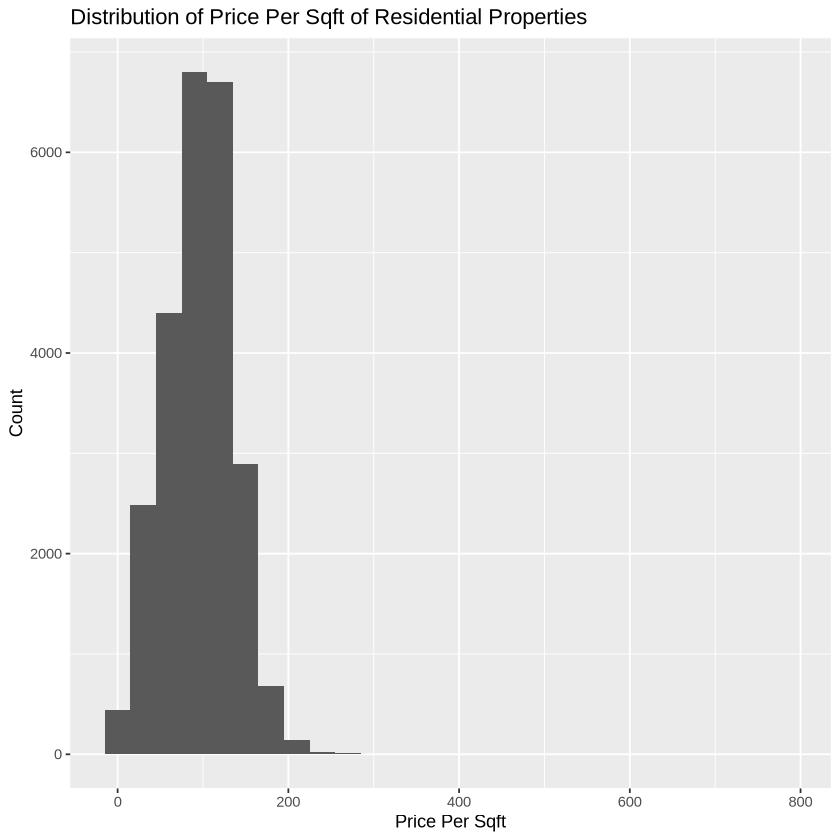

In [6]:
Res_price_per_sqft_dist <- Residential_data |>
    ggplot(aes(x = Price_per_sqft)) +
    geom_histogram(binwidth = 30) +
    labs(x = "Price Per Sqft", y = "Count") +
    ggtitle("Distribution of Price Per Sqft of Residential Properties")
Res_price_per_sqft_dist

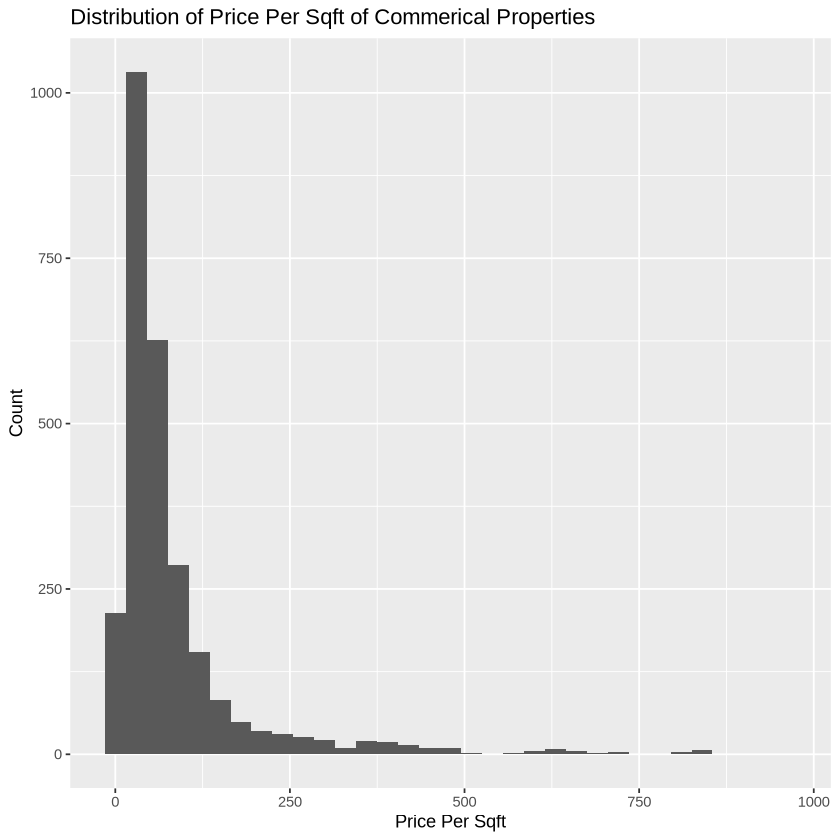

In [7]:

Com_price_per_sqft_dist <- Commerical_data |>
    ggplot(aes(x = Price_per_sqft)) +
    geom_histogram(binwidth = 30) +
    labs(x = "Price Per Sqft", y = "Count") +
    ggtitle("Distribution of Price Per Sqft of Commerical Properties")


Com_price_per_sqft_dist


# Methods: Plan



The credibility of this report stems from several key elements. Firstly, the dataset used in our analysis is sourced directly from the official Milwaukee government website, ensuring data integrity and reliability. We are committed to robust and transparent data analysis, with a focus on providing reliable results through appropriate statistical testing. Additionally, we welcome feedback from peers and mentors to further enhance the report's trustworthiness.

Hypothesis Testing: We will conduct a hypothesis test to evaluate whether there is a significant difference in the mean and median of price per square foot between Residential and Commercial properties. We will compare both bootstrapping and asymptotic methods to ensure robustness and comprehensiveness in our findings.

Confidence Intervals: Alongside hypothesis testing, we will calculate confidence intervals for the mean price per square foot for both property types. These intervals will provide a range of values within which we can be confident the true population parameter lies, offering a more complete perspective on property values.

We expect that our analysis will reveal insights into the pricing disparities between Residential and Commercial properties. If a statistically significant difference in mean price per square foot exists, this finding can have substantial implications for real estate investors, property developers, and city planners. Stakeholders may use this information to make more informed decisions about property investments, zoning regulations, and urban development strategies.


# Hypothesis Testing: Bootstrapping

# Hypothesis Testing: Asymptotic

As above, our null hypothesis is that Mean Price per Square Foot will be the same for both populations, and our alternative hypothesis is that Mean Price per Square Foot will be different. For hypothesis testing we will be using the normal distribution as our sample size meets all the assumptions required and is large enough that the Student T-distribution is not required.

Warning message:
“Removed 204 rows containing non-finite values (`stat_boxplot()`).”


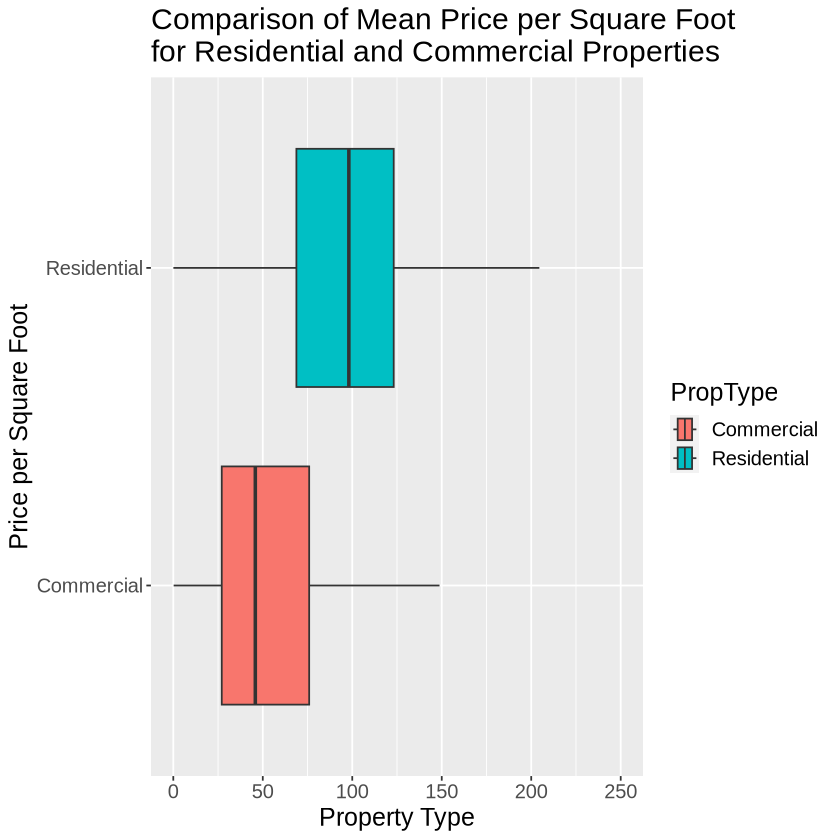

In [8]:
mean_sqft_boxplot <- housing_data |>
    ggplot() +
    geom_boxplot(aes(x = Price_per_sqft, y = PropType, fill = PropType), outlier.shape = NA) +
    xlim(c(0,250)) +
    theme(text = element_text(size = 15)) +
    ggtitle("Comparison of Mean Price per Square Foot\nfor Residential and Commercial Properties") +
    xlab("Property Type") +
    ylab("Price per Square Foot")

mean_sqft_boxplot    

Here we start by constructing a boxplot to compare the means of both populations, from which we can determine that the Residential mean is higher compared to the Commercial mean. This will let us know that we should be subtracting Commercial from Residential when calculating our mean difference to see if this difference is statistically significant or not.

In [10]:
housing_summary <- housing_data |>
    group_by(PropType) |>
    summarise(mean = mean(Price_per_sqft), 
               sd = sd(Price_per_sqft), 
               n = n())

housing_summary    

PropType,mean,sd,n
<chr>,<dbl>,<dbl>,<int>
Commercial,82.93050,108.70941,2676
Residential,96.37815,41.07189,24596


Now we calculate the summary statistics required to calculate the test statistic which we will use for our hypothesis test

In [12]:
standard_error <- sqrt((housing_summary$sd[2]^2/housing_summary$n[2]) + (housing_summary$sd[1]^2/housing_summary$n[1]))
z <- (housing_summary$mean[2] - housing_summary$mean[1])/standard_error

z

[1] 6.350034

Here we calculate our standard error using the formula *SE = sqrt((s1^2/n1) + (s2^2/n2))* and calculate our test statistic using the formula *z = (mean1 - mean2 - null mean)/SE* where in our case the null mean u

# Confidence Intervals

# Discussion 

# Summary

# What future questions could this lead to?
The results of this study may lead to several future research questions and avenues for exploration, including:

What are the key drivers behind the observed variations in property values, such as location, property size, neighborhood amenities, or economic factors?

What are the socioeconomic and equity implications of the disparities in property prices, particularly concerning access to housing and business opportunities?

How can city planners and policymakers adapt urban development policies to promote balanced and inclusive communities based on the insights from this analysis?

These questions reflect the research expectations and potential avenues for further investigation arising from the study's findings.

In summary, the results of this analysis have the potential to spark a broader discussion and further research into the dynamics of the real estate market, property investment strategies, and their broader impacts on urban development and socioeconomic equity.

# References


Dataset:
https://www.kaggle.com/datasets/agungpambudi/property-sales-data-real-estate-trends/


Other:
Clark, Stephen and Lomax, Nik. "Rent/price ratio for English housing sub-markets using matched sales and rental data." Area, vol. 52, no. 1, 2020, https://doi.org/10.1111/area.12555

Gougeon, Annik and Moussouni, Oualid. "Residential real estate sales in 2018: Characteristics of properties sold." Statistics Canada, 11 August 2021, https://publications.gc.ca/collections/collection_2021/statcan/46-28-0001/CS462-80001-2021-1-eng.pdf.

